# Behavioral result

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set_theme(style="white")

Participants: 203 (10)
Adults: 73
Juveniles: 130


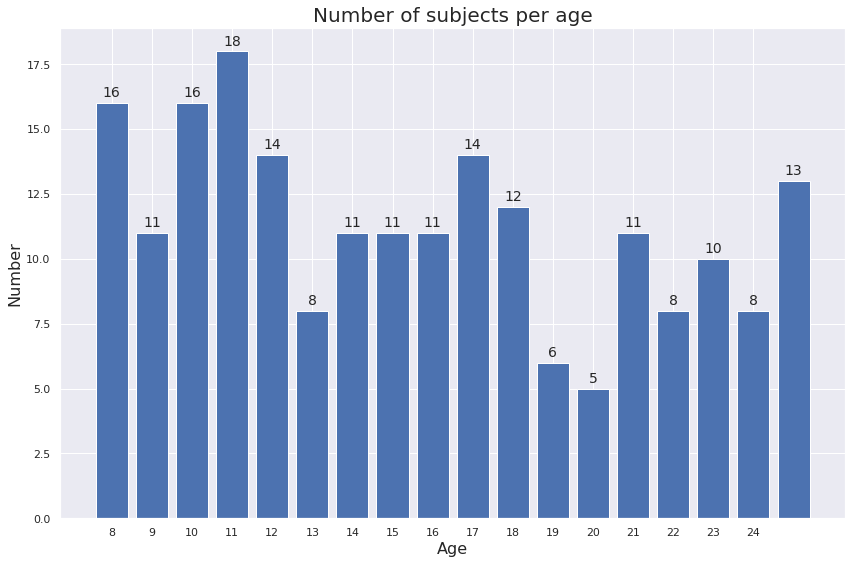

In [95]:
participants_file = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(participants_file,sep='\t')
data = data[data['game1_fmri']>=0.5]
print("Participants:", len(data),f"({len(data[data['game1_fmri']==0.5])})")
print("Adults:", len(data.query("Age>=18")))
print("Juveniles:", len(data.query("Age<18")))

# extract subject's number in each group
ages = []
nums = []
for subs in data.groupby('Age'):
    ages.append(subs[0])
    nums.append(len(subs[1]))

# plot bar chart of subject's number with labels
fig,ax = plt.subplots(figsize=(12,8))
#ax.plot([7.5,18.5],[10,10],color='r')
rects = ax.bar(ages,nums,color='b')

# add some text for labels, title and custom x-axis tick labels, etc
ax.set_xlabel("Age",size=16)
ax.set_ylabel("Number",size=16)
ax.set_xticks(range(8,25))
ax.set_title("Number of subjects per age",size=20)
ax.bar_label(rects,padding=3,size=14)

fig.tight_layout()
savepath = r'/mnt/workdir/DCM/result/behaviour/subjects-game1.png'
plt.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)
plt.show()

## Training performance

203


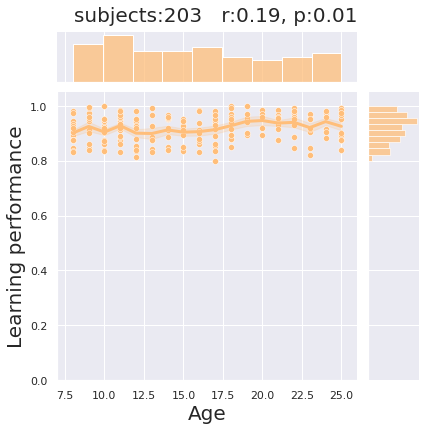

In [98]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
print(len(data))
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
# correlation
res = pearsonr(data['Age'],data['training_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="training_acc", data=data,
                  kind="scatter",#, truncate=False,
                  xlim=(7, 26), ylim=(0, 1.05),color='#ffbe7a', height=6)
sns.lineplot(x="Age",y="training_acc",data=data,linewidth=3,errorbar='se',color='#ffbe7a')
#move overall title up
g.set_axis_labels('Age', 'Learning performance',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('subjects:{}   r:{}  p<0.001'.format(len(data),round(r,2)))
else:
    g.fig.suptitle('subjects:{}   r:{}, p:{}'.format(len(data),round(r,2),round(p,2)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/age-training.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

# Training number

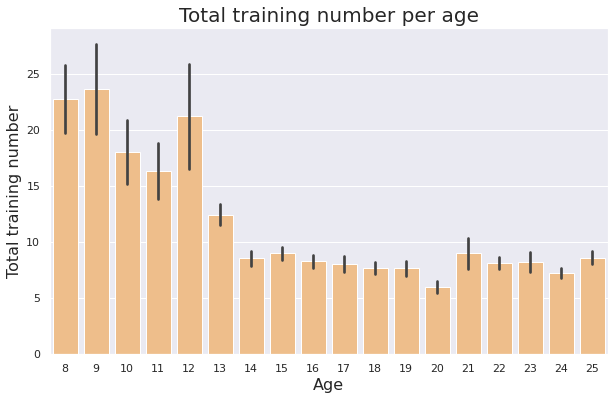

In [108]:
training_file = pd.read_excel(r'/mnt/workdir/DCM/result/training/Valid information_203.xlsx')
# plot bar plot with error bar using seaborn the total number of training with ages from training file's Total_Counts and Age column

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Age',y='Total_Counts',data=training_file,ax=ax,errorbar='se',color='#ffbe7a')
ax.set_xlabel("Age",size=16)
ax.set_ylabel("Total training number",size=16)
ax.set_title("Total training number per age",size=20)
#ax.set_xticks(range(8,25))
#ax.set_ylim(0,100)
savepath = r'/mnt/workdir/DCM/result/behaviour/age-training-num.png'
plt.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)
plt.show()

# Training time

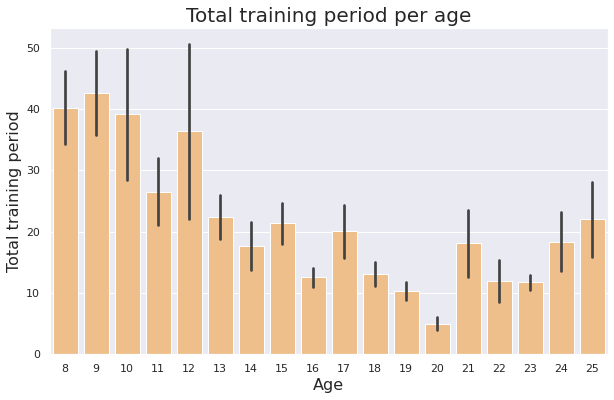

In [109]:
training_file = pd.read_excel(r'/mnt/workdir/DCM/result/training/Valid information_203.xlsx')
# plot bar plot with error bar using seaborn the total number of training with ages from training file's Training_time and Age column
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Age',y='Training_time',data=training_file,ax=ax,errorbar='se',color='#ffbe7a')
ax.set_xlabel("Age",size=16)
ax.set_ylabel("Total training period",size=16)
ax.set_title("Total training period per age",size=20)
#ax.set_xticks(range(8,25))
#ax.set_ylim(0,100)
savepath = r'/mnt/workdir/DCM/result/behaviour/age-training-period.png'
plt.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)
plt.show()

# Dropout subjects

The number of dropout subjects : 267


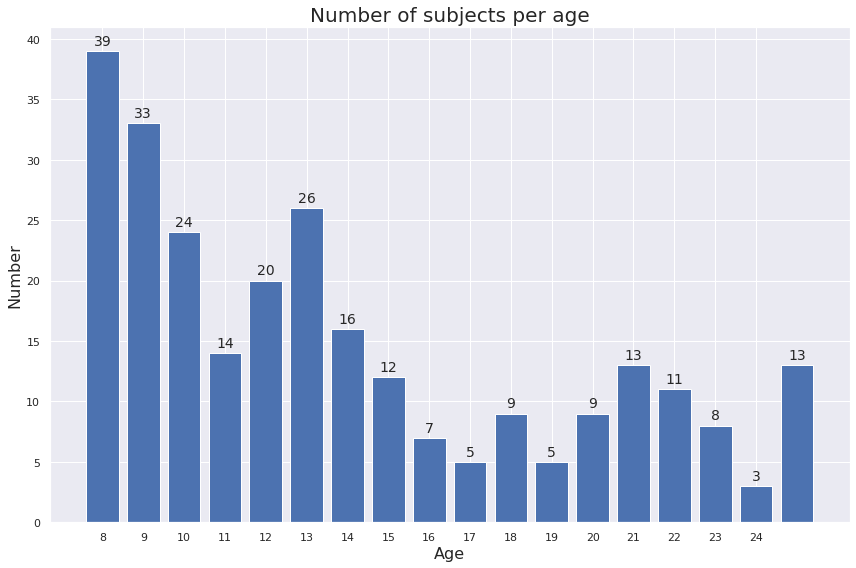

In [5]:
dropout_file = pd.read_excel(r"/mnt/workdir/DCM/result/training/participants who drop out.xlsx")
print("The number of dropout subjects :", len(dropout_file))

# extract subject's number in each group
ages = []
nums = []
for subs in dropout_file.groupby('Age'):
    ages.append(subs[0])
    nums.append(len(subs[1]))

# plot bar chart of subject's number with labels
fig,ax = plt.subplots(figsize=(12,8))
rects = ax.bar(ages,nums,color='b')

# add some text for labels, title and custom x-axis tick labels, etc
ax.set_xlabel("Age",size=16)
ax.set_ylabel("Number",size=16)
ax.set_xticks(range(8,25))
ax.set_title("Number of subjects per age",size=20)
ax.bar_label(rects,padding=3,size=14)

fig.tight_layout()
savepath = r'/mnt/workdir/DCM/result/behaviour/dropout_subjects.png'
plt.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)
plt.show()

# Group difference between adults and Juveniles

Mean training accuracy of adults: 0.9339344262295083
Mean traning accuracy of juveniles: 0.9114583333333331
3.109148838151593 0.002145665473056098


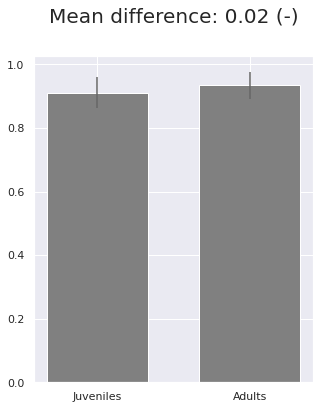

In [28]:
from scipy.stats import ttest_ind
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
adults_acc = data[data['Age']>18]['training_acc']
juveniles_acc = data[data['Age']<=18]['training_acc']

print('Mean training accuracy of adults:',adults_acc.mean())
print("Mean traning accuracy of juveniles:",juveniles_acc.mean())
r,p = ttest_ind(adults_acc,juveniles_acc)
print(r,p)

# Calculate the mean and standard deviation of each group
adults_mean, adults_std = np.mean(adults_acc), np.std(adults_acc)
children_mean, children_std = np.mean(juveniles_acc), np.std(juveniles_acc)

# Calculate the difference between the means
mean_diff = adults_mean - children_mean

# Set the bar plot parameters
bar_width = 0.2
error_config = {'ecolor': '0.4'}

# Plot the bar plot
fig, ax = plt.subplots(figsize=(5,6))
children_bar = ax.bar(0.1, children_mean, bar_width, color= 'grey',yerr=children_std, error_kw=error_config, label='Juveniles',align='center')
adults_bar = ax.bar(0.4, adults_mean, bar_width, color= 'grey',yerr=adults_std, error_kw=error_config, label='Adults',align='center')
ax.set_xticks([0.1, 0.4])
ax.set_xticklabels(['Juveniles','Adults'])

# Add the sign of the difference to the plot
if mean_diff > 0:
    sign = '-'
else:
    sign = '+'
ax.text(0.25, max(adults_mean, children_mean)+0.2, 'Mean difference: {:.2f} ({})'.format(abs(mean_diff), sign), ha='center',fontsize=20)
plt.show()

## Age - 1D Inference

205


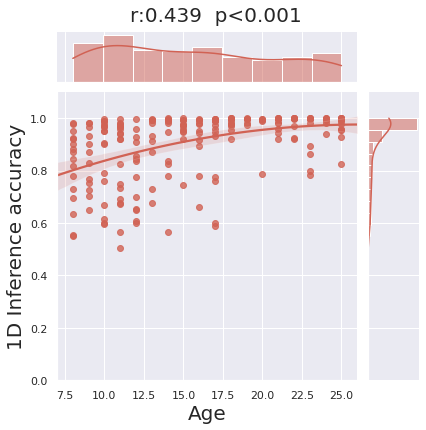

In [29]:
beha_total_score = r'//mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
print(len(data))
res = pearsonr(data['Age'],data['1D_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="1D_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 26), ylim=(0, 1.1),
                  color="#d16254", height=6,order=2)

#move overall title up
g.set_axis_labels('Age', '1D Inference accuracy',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/age-1Dtask.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

## Age - 2D Inference game1

203


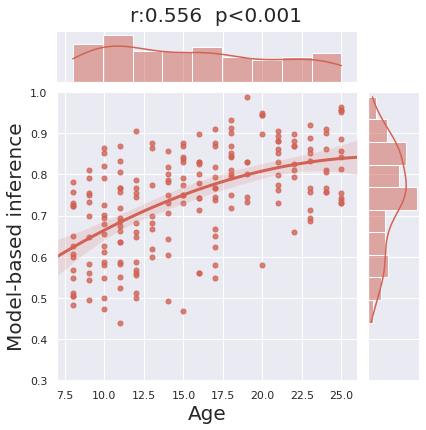

In [83]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]

print(len(data))
res = pearsonr(data['Age'],data['game1_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="game1_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 26), ylim=(0.3, 1),
                  color="#d16254", height=6,order=2,scatter_kws={'s':25},
                  line_kws={'linewidth':3})

#move overall title up
g.set_axis_labels('Age', 'Model-based inference',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/age-2Dgame1.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

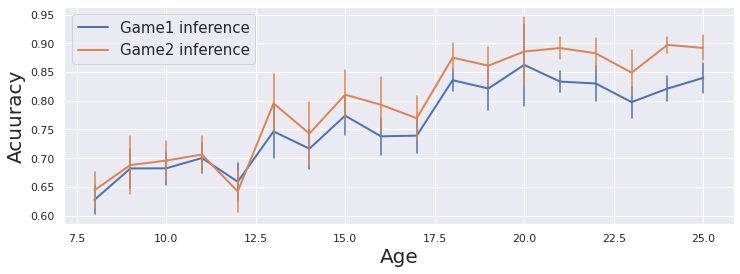

In [44]:
import numpy as np
from scipy.interpolate import make_interp_spline
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

data = data[data['game2_fmri']>=0.5]
ages = []
train_accs = []
game1_accs = []
game2_accs = []
for sub in data.itertuples():
    ages.append(sub.Age)
    train_accs.append(sub.training_acc)
    game1_accs.append(sub.game1_acc)
    game2_accs.append(sub.game2_test_acc)

fig,ax = plt.subplots(1,1,figsize=(12,4))
#sns.lineplot(x=ages,y=train_accs,linewidth=2.5,label='Pairwise memory',errorbar='se',err_style='bars')
sns.lineplot(x=ages,y=game1_accs,linewidth=2,label='Game1 inference',errorbar='se',err_style='bars')
sns.lineplot(x=ages,y=game2_accs,linewidth=2,label='Game2 inference',errorbar='se',err_style='bars')
plt.legend(fontsize=15)
plt.xlabel("Age",size=20)
plt.ylabel("Acuuracy",size=20)
savepath = r'/mnt/workdir/DCM/result/behaviour/age-2dacc-curve.png'

Age group: children, t: -0.26726085809491246, p: 0.7896673192899204
Age group: adolescents, t: -1.4914336012781955, p: 0.13899559374148643
Age group: adults, t: -3.6381515524427903, p: 0.00038349353610054373


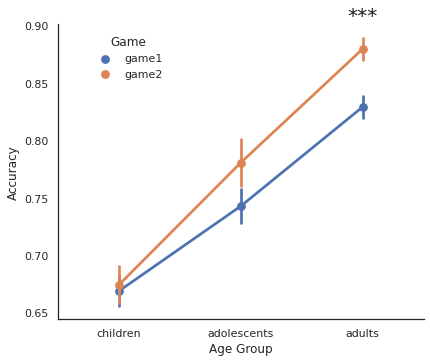

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score, sep='\t')
data['training_acc'] = (data['train_ap'] + data['train_dp']) / 2
data['game1'] = data['game1_acc']
data['game2'] = data['game2_test_acc']

data = data[data['game2_fmri'] >= 0.5]

# Add age group categories
age_bins = [7, 12, 17, 25]
age_labels = ['children', 'adolescents', 'adults']
data['age_group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Melt the data for easier plotting
data_melted = data.melt(id_vars=['age_group'], value_vars=['game1', 'game2'],
                        var_name='game', value_name='accuracy')

# Plot the data
g = sns.catplot(x='age_group', y='accuracy', hue='game', data=data_melted, kind='point', errorbar="se")
g.set_axis_labels("Age Group", "Accuracy")
g._legend.set_title('Game')
g._legend.set_bbox_to_anchor((0.3, 0.85)) #4Adjust these values to position the legend closer to the figure
g.fig.set_size_inches(10,4)

# compare accuracy between game1 and game2 for each age groups using t-tests
for index,age_group in enumerate(age_labels):
    game1 = data_melted[(data_melted['age_group'] == age_group) & (data_melted['game'] == 'game1')]['accuracy']
    game2 = data_melted[(data_melted['age_group'] == age_group) & (data_melted['game'] == 'game2')]['accuracy']
    t, p = ttest_ind(game1, game2)
    print('Age group: {}, t: {}, p: {}'.format(age_group, t, p))
    # add significance stars to the plot for each age group
    if p <= 0.001:
        g.ax.text(index,0.90,'***', ha='center', va='bottom', color='k', fontsize=20)
    elif p <= 0.01:
        g.ax.text(index,0.91,'**', ha='center', va='bottom', color='k', fontsize=20)
    elif p <= 0.05:
        g.ax.text(index,0.91,'*', ha='center', va='bottom', color='k', fontsize=20)
    else:
        g.ax.text(index,0.91,'', ha='center', va='bottom', color='k', fontsize=20)



#savepath = r'/mnt/workdir/DCM/result/behaviour/age-2dacc-curve2.png'
#plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300)

### Partial correlation: Age - 2D Inference game1 by controling training performance

In [32]:
import pingouin as pg

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
pg.partial_corr(data=data, x='Age', y='game1_acc', covar=['training_acc'])

,n,r,CI95%,p-val
pearson,205,0.54957,"[0.45, 0.64]",1.704486e-17


In [7]:
import pandas as pd
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

print(len(data))
X = data[['Age','training_acc','1D_acc']]
Y = data['game1_acc']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

203
                            OLS Regression Results                            
Dep. Variable:              game1_acc   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     183.0
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           5.79e-57
Time:                        20:21:32   Log-Likelihood:                 271.64
No. Observations:                 203   AIC:                            -535.3
Df Residuals:                     199   BIC:                            -522.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3594      0.086     -4.19

# Game2

#### Subject information

Participants: 193 (8)
Adults: 72
Juveniles: 121


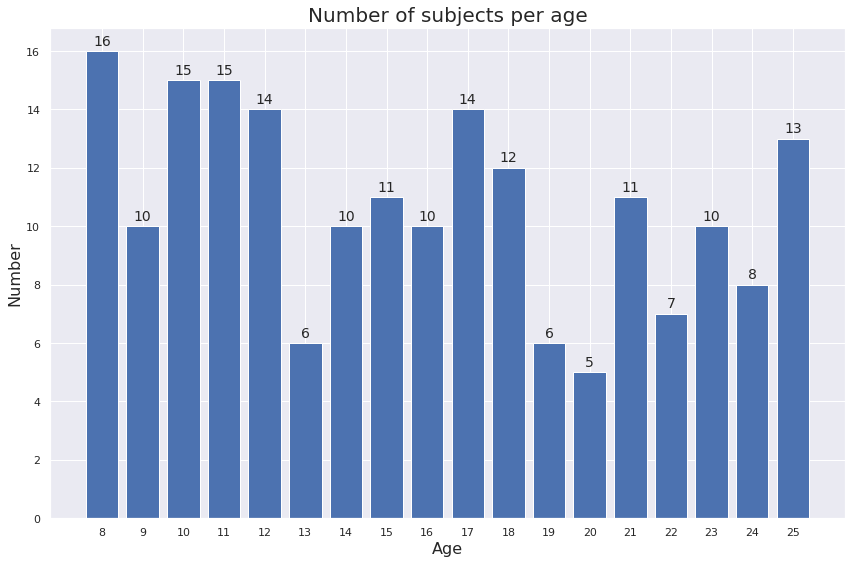

In [97]:
participants_file = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(participants_file,sep='\t')
data = data[data['game2_fmri']>=0.5]
print("Participants:", len(data),f"({len(data[data['game2_fmri']==0.5])})")
print("Adults:", len(data.query("Age>=18")))
print("Juveniles:", len(data.query("Age<18")))

# extract subject's number in each group
ages = []
nums = []
for subs in data.groupby('Age'):
    ages.append(subs[0])
    nums.append(len(subs[1]))

# plot bar chart of subject's number with labels
fig,ax = plt.subplots(figsize=(12,8))
#ax.plot([7.5,18.5],[10,10],color='r')
rects = ax.bar(ages,nums,color='b')

# add some text for labels, title and custom x-axis tick labels, etc
ax.set_xlabel("Age",size=16)
ax.set_ylabel("Number",size=16)
ax.set_xticks(range(8,26))
ax.set_title("Number of subjects per age",size=20)
ax.bar_label(rects,padding=3,size=14)

fig.tight_layout()
savepath = r'/mnt/workdir/DCM/result/behaviour/subjects-game2.png'
plt.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)
plt.show()

### Age - game2

193


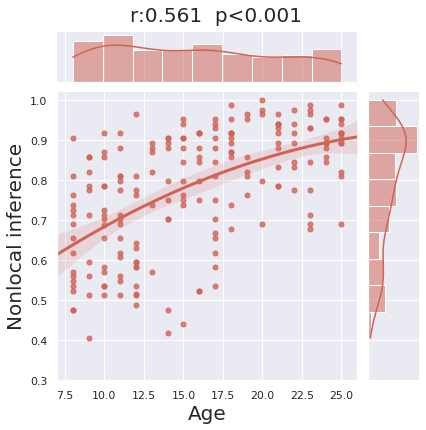

In [89]:
#age-game2
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data.query('game2_fmri>=0.5')

print(len(data))
# cal correlation
res = pearsonr(data['Age'],data['game2_test_acc'])
r = res[0]
p = res[1]
# plot
g = sns.jointplot(x="Age", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 26), ylim=(0.3, 1.02),
                  color="#d16254", height=6,order=2,scatter_kws={'s':25},
                  line_kws={'linewidth':3})

#move overall title up
g.set_axis_labels('Age', 'Nonlocal inference',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/age-2Dgame2test.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

195


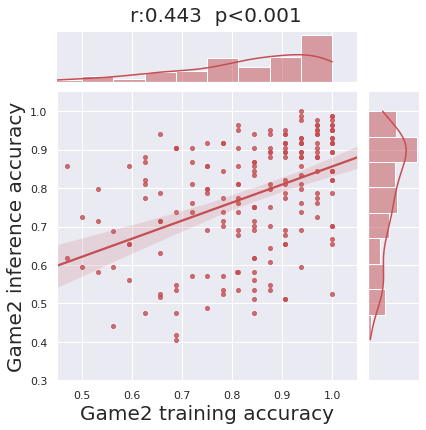

In [49]:
#age-game2
beha_total_score = r'//mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data.query('game2_fmri>=0.5')
game2_train_ap =  data['game2_train_ap'].to_list()
game2_train_ap = [float(p) for p in game2_train_ap]
data['game2_train_ap'] = game2_train_ap
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2
print(len(data))
# cal correlation
res = pearsonr(data['game2_training_acc'],data['game2_test_acc'])
r = res[0]
p = res[1]
# plot
g = sns.jointplot(x="game2_training_acc", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(0.45, 1.05), ylim=(0.3, 1.05),
                  color="r", height=6,scatter_kws={'s':16,'alpha':0.8},order=1)
#move overall title up
g.set_axis_labels('Game2 training accuracy', 'Game2 inference accuracy',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

savepath = r'/mnt/workdir/DCM/result/behaviour/game2trian-game2test.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

In [37]:
import pingouin as pg

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_fmri']>=0.5]
game2_train_ap =  data['game2_train_ap'].to_list()
game2_train_ap = [float(p) for p in game2_train_ap]
data['game2_train_ap'] = game2_train_ap
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2
pg.partial_corr(data=data, x='Age', y='game2_test_acc', covar=['game2_training_acc'])

,n,r,CI95%,p-val
pearson,195,0.427701,"[0.31, 0.54]",4.967038e-10


###  Age -  correlation between game1 and game2

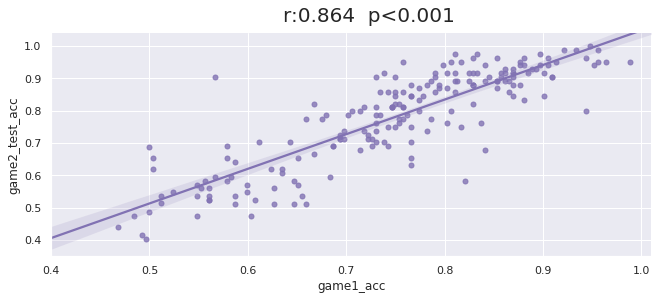

In [90]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data.query('game2_fmri>=0.5')

# plot
g = sns.jointplot(x="game1_acc", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(0.4, 1.01), ylim=(0.35, 1.04),scatter_kws={'s':25,'alpha':0.8},
                  color="m", height=6,order=1)

res = pearsonr(data['game1_acc'],data['game2_test_acc'])
r = res[0]
p = res[1]

#move overall title up
#g.set_axis_labels('2D Inference-game1 accuracy', '2D Inference-game2 accuracy',size=20)
g.fig.subplots_adjust(top=1.05)
g.fig.suptitle('r:{}  p:{}'.format(r,p))
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

# Set the figure size
g.fig.set_size_inches(12, 4)
g.ax_marg_x.remove()
g.ax_marg_y.remove()
savepath = r'/mnt/workdir/DCM/result/behaviour/game1-game2.png'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)

## Game2 GLM

In [51]:
import pandas as pd
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_fmri']>=0.5]
game2_train_ap =  data['game2_train_ap'].to_list()
game2_train_ap = [float(p) for p in game2_train_ap]
data['game2_train_ap'] = game2_train_ap
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2
print(len(data))

data['Model-based inference'] = data['game1_acc']
data['Memory for new knowledge'] = data['game2_training_acc']
data['Nonlocal inference for new knowledge'] = data['game2_test_acc']

X = data[['Age','Model-based inference',"Memory for new knowledge"]]
Y = data['Nonlocal inference for new knowledge']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

195
                                     OLS Regression Results                                     
Dep. Variable:     Nonlocal inference for new knowledge   R-squared:                       0.759
Model:                                              OLS   Adj. R-squared:                  0.755
Method:                                   Least Squares   F-statistic:                     200.1
Date:                                  Tue, 21 Mar 2023   Prob (F-statistic):           1.09e-58
Time:                                          14:06:03   Log-Likelihood:                 233.98
No. Observations:                                   195   AIC:                            -460.0
Df Residuals:                                       191   BIC:                            -446.9
Df Model:                                             3                                         
Covariance Type:                              nonrobust                                         
                          

## Trial difficult analysis - 1

## Trial difficult analysis - 2

In [42]:
import os
import math
import numpy as np
from os.path import join
import pandas as pd
from scipy.stats import ttest_ind
def game1_acc(subject, trial_check=True):
    """Calculat the accuracy of task game1"""
    global fight_result
    behDataDir = r'/mnt/workdir/DCM/sourcedata'
    taskDataDir = join(behDataDir,'sub_{}'.format(subject), 'Behaviour','fmri_task-game1')
    behData = []
    for i in range(1,7):
        file_name = 'sub-{}_task-game1_run-{}.xlsx'.format(subject,i)
        file_path = join(taskDataDir,file_name)
        if os.path.exists(file_path):
            run_df = pd.read_excel(file_path)
        else:
            file_name = 'sub-{}_task-game1_run-{}.csv'.format(subject,i)
            file_path = join(taskDataDir,file_name)
            if os.path.exists(file_path):
                run_df = pd.read_csv(file_path)
            else:
                print('Warning: The run {} did not find in the sub-{} directory'.format(i,subject))
                continue
        behData.append(run_df)
    behData = pd.concat(behData,axis=0)
    # clean and check the trial number is right
    behData = behData.dropna(subset=['pic1'])
    if trial_check:
        if len(behData) != 252:
            print('The trial number of sub-{} is not right! It is {} Please check data.'.format(subject,len(behData)))
        else:
            print('The trial number of sub-{} is 252'.format(subject))

    # calculate the correct rate
    columns = behData.columns
    behData = behData.fillna('None')
    if 'resp.keys' in columns:
        keyResp_list = behData['resp.keys']
    elif 'resp.keys_raw' in columns:
        keyResp_tmp = behData['resp.keys_raw']
        keyResp_list = []
        for k in keyResp_tmp:
            if k == 'None':
                keyResp_list.append(k)
            else:
                keyResp_list.append(k[1])

    trial_corr = []
    trial_label = []
    angles = []
    none_trial = 0
    for keyResp,row in zip(keyResp_list, behData.itertuples()):
        # record angle
        angles.append(row.angles)
        rule = row.fightRule
        # calculate correct answer
        if rule == '1A2D':
            fight_result = row.pic1_ap - row.pic2_dp
            if fight_result > 0:
                correctAns = 1
            else:
                correctAns = 2
        elif rule == '1D2A':
            fight_result = row.pic2_ap - row.pic1_dp
            if fight_result > 0:
                correctAns = 2
            else:
                correctAns = 1

        # label pairs' rank whether is equal.
        if fight_result == 0:
            trial_label.append('equal rank')
        else:
            trial_label.append('unequal rank')

        # determine if the answer is correct
        if (keyResp == 'None') or (keyResp == None):
            trial_corr.append(False)
            none_trial += 1
        elif int(keyResp) == correctAns:
            trial_corr.append(True)
        else:
            trial_corr.append(False)
    accuracy = np.round(np.sum(trial_corr) / len(behData),3)
    # print(f'the number of miss trials of sub-{subject} :',none_trial)
    sub_score = pd.DataFrame({'corr':trial_corr,'label':trial_label})
    equal_trial_result = sub_score.query("label=='equal rank'")
    unequal_trial_result = sub_score.query("label=='unequal rank'")
    equal_trial_score = equal_trial_result['corr'].mean()
    unequal_trial_score = unequal_trial_result['corr'].mean()
    return accuracy,equal_trial_score,unequal_trial_score


if __name__ == "__main__":
    participants_tsv = r'/mnt/workdir/DCM/BIDS/participants.tsv'
    participants_data = pd.read_csv(participants_tsv, sep='\t')
    data = participants_data.query('game1_fmri>=0.5')
    pid = data['Participant_ID'].to_list()
    subjects = [p.split('-')[-1] for p in pid]

    subject_acc = pd.DataFrame()
    for subject in subjects:
        acc,eacc,ueacc= game1_acc(subject, trial_check=True)
        subject_acc = subject_acc.append({"accuracy":acc,"equal_trial_acc":eacc,"unequal_trial_acc":ueacc},ignore_index=True)

The trial number of sub-010 is 252
The trial number of sub-011 is 252
The trial number of sub-012 is 252
The trial number of sub-015 is 252
The trial number of sub-016 is 252
The trial number of sub-017 is 252
The trial number of sub-018 is 252
The trial number of sub-022 is 252
The trial number of sub-023 is 252
The trial number of sub-024 is 252
The trial number of sub-025 is 252
The trial number of sub-029 is 252
The trial number of sub-031 is 252
The trial number of sub-032 is 252
The trial number of sub-036 is 252
The trial number of sub-037 is 252
The trial number of sub-043 is 252
The trial number of sub-046 is 252
The trial number of sub-049 is 252
The trial number of sub-050 is 252
The trial number of sub-053 is 252
The trial number of sub-055 is 252
The trial number of sub-059 is 252
The trial number of sub-060 is 252
The trial number of sub-061 is 252
The trial number of sub-062 is 252
The trial number of sub-063 is 252
The trial number of sub-064 is 252
The trial number of 

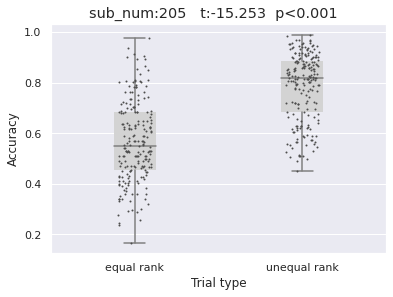

In [43]:
import matplotlib.pyplot as plt


# reshape data to plot
acc = subject_acc['equal_trial_acc'].to_list() + subject_acc['unequal_trial_acc'].to_list()
sub_num = len(subject_acc)
trial_label = sub_num*['equal rank'] + sub_num*['unequal rank']
plot_df = pd.DataFrame({'Trial type':trial_label,'Accuracy':acc})
fig, ax = plt.subplots()
sns.boxplot(x='Trial type', y="Accuracy", data=plot_df, width=.25,
            palette=[ "lightgray","lightgray"],
            boxprops={'edgecolor':'None'},
            )
sns.stripplot(x='Trial type', y="Accuracy", data=plot_df, size=2, color='.3', linewidth=0)

# set title and significant test
t,p = ttest_ind(subject_acc['equal_trial_acc'],subject_acc['unequal_trial_acc'])
fig.subplots_adjust(top=0.92)
if p < 0.001:
    fig.suptitle('sub_num:{}   t:{}  p<0.001'.format(sub_num,round(t,3)))
else:
    fig.suptitle('sub_num:{}   t:{}, p:{}'.format(sub_num,round(t,3),round(t,3)),size=20)